In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con low_memory=False para evitar la advertencia
df = pd.read_csv('93182_steam_games.csv', low_memory=False)


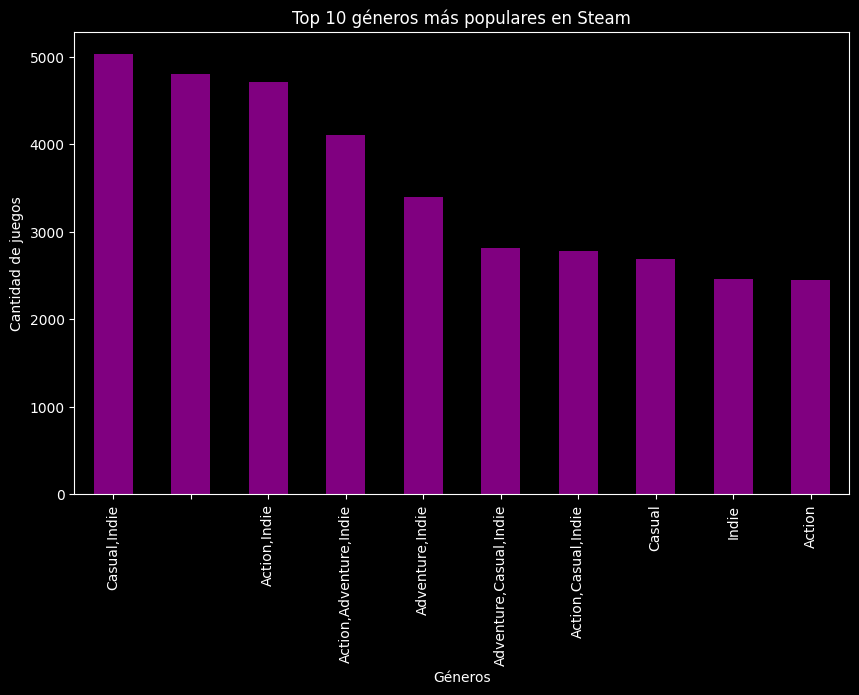

In [19]:
# Dividir los géneros y contarlos
df['Genres'] = df['Genres'].fillna('')  # Asegurar que no haya valores NaN
genres_split = df['Genres'].str.split(';').explode()  # Separar por género
genres_count = genres_split.value_counts().head(10)  # Contar los géneros más populares

# Graficar
plt.figure(figsize=(10,6))
genres_count.plot(kind='bar', color='purple')
plt.xlabel('Géneros')
plt.ylabel('Cantidad de juegos')
plt.title('Top 10 géneros más populares en Steam')
plt.show()


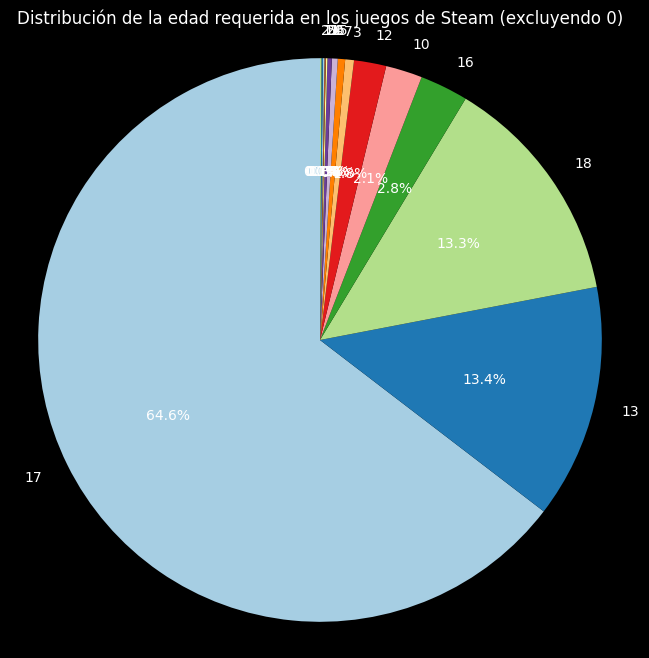

In [21]:
# Filtrar los juegos con edad requerida mayor que 0
df_filtered_age = df[df['Required age'] > 0]

# Distribución de la edad requerida
age_distribution = df_filtered_age['Required age'].value_counts()

# Configuración del fondo negro
plt.style.use('dark_background')

# Graficar como pie chart
plt.figure(figsize=(8,8))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de la edad requerida en los juegos de Steam (excluyendo 0)', color='white')
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()



<Figure size 1000x600 with 0 Axes>

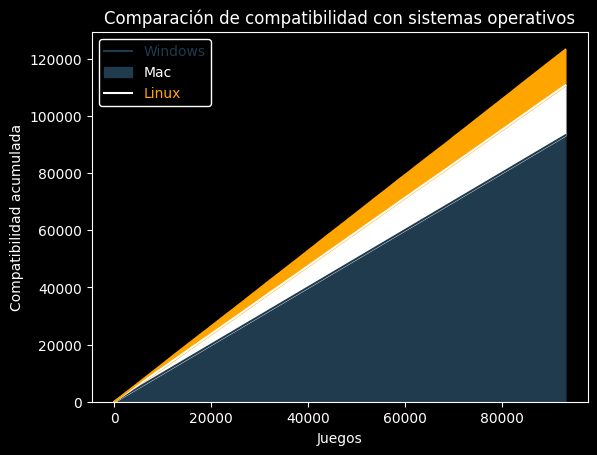

In [14]:
# Crear el DataFrame que contiene solo los sistemas operativos y eliminar valores vacíos o nulos
df_os_filtered = df[['Windows', 'Mac', 'Linux']].dropna()

# Contar los juegos compatibles con cada sistema operativo (asumimos que 1 indica compatibilidad)
df_os_filtered = df_os_filtered.astype(int)  # Convertir valores True/False a 1/0
df_os_sums = df_os_filtered.sum()

# Configuración de colores
plt.style.use('dark_background')  # Establecer el fondo negro

# Colores personalizados para los sistemas operativos
colors = ['#1f3b4d', 'white', 'orange']  # Windows: azul oscuro, Mac: blanco, Linux: naranja

# Graficar como áreas apiladas
plt.figure(figsize=(10,6))
df_os_filtered.cumsum(axis=0).plot(kind='area', stacked=True, color=colors)  # Aplicar colores personalizados
plt.title('Comparación de compatibilidad con sistemas operativos', color='white')
plt.xlabel('Juegos', color='white')
plt.ylabel('Compatibilidad acumulada', color='white')

# Actualizar la leyenda con los colores correctos
plt.legend(['Windows', 'Mac', 'Linux'], loc='upper left', facecolor='black', edgecolor='white', framealpha=1, fontsize=10, labelcolor=['#1f3b4d', 'white', 'orange'])

plt.grid(False)  # Desactivar la cuadrícula
plt.show()


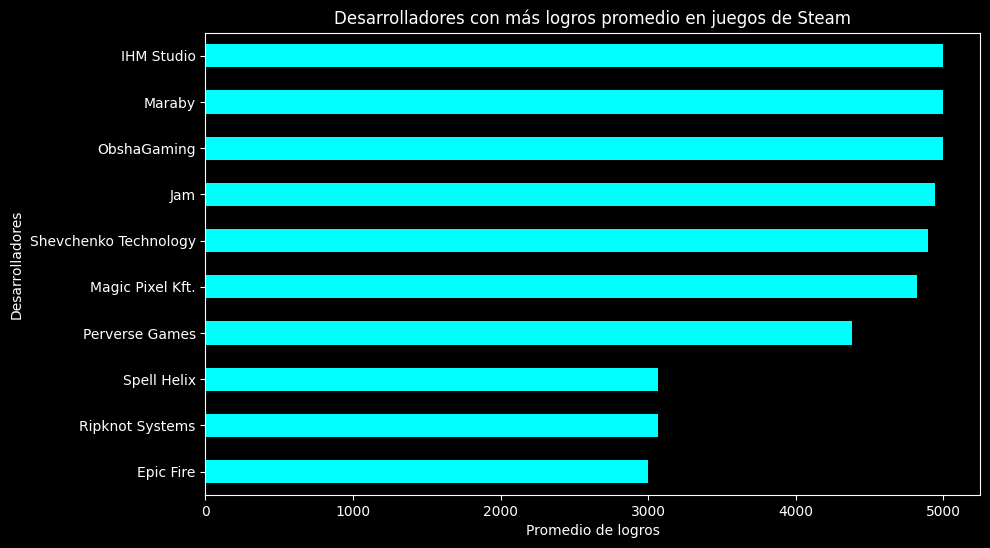

In [26]:
# Filtrar los NaN en 'Achievements' y asegurarse de que sean numéricos
df['Achievements'] = pd.to_numeric(df['Achievements'], errors='coerce')
df_filtered_developers = df[['Developers', 'Achievements']].dropna()

# Agrupar por desarrollador y calcular el promedio de logros
developers_achievements = df_filtered_developers.groupby('Developers')['Achievements'].mean().sort_values(ascending=False).head(10)

# Configuración del fondo negro
plt.style.use('dark_background')

# Graficar
plt.figure(figsize=(10,6))
developers_achievements.plot(kind='barh', color='cyan')
plt.xlabel('Promedio de logros')
plt.ylabel('Desarrolladores')
plt.title('Desarrolladores con más logros promedio en juegos de Steam')
plt.gca().invert_yaxis()  # Invertir el eje
plt.show()
